In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
CD = pd.read_csv('Company_Data.csv')

In [3]:
CD

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
CD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
CD['Sales'].min()
CD['Sales'].max()
CD['Sales'].value_counts()

7.80    4
6.20    3
6.67    3
8.77    3
6.88    3
       ..
7.50    1
8.89    1
7.58    1
5.64    1
8.14    1
Name: Sales, Length: 336, dtype: int64

In [6]:
np.median(CD["Sales"])

7.49

In [7]:
CD["sales"]= "<=7.49"
CD.loc[CD["Sales"]>=7.49,"sales"]=">=7.49"



In [8]:
CD["sales"].unique()
CD["sales"].value_counts()


>=7.49    201
<=7.49    199
Name: sales, dtype: int64

In [9]:
##Dropping Sales column from the data 
#CD.drop(["Sales"],axis=1,inplace = True)
CD.replace({'sales':{'>=7.49':1,'<=7.49':0}}, inplace=True)
CD


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,1
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,0
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,0
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,0


In [10]:
CD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
 11  sales        400 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 37.6+ KB


In [11]:
#scaling
label_encoder = preprocessing.LabelEncoder()
CD['ShelveLoc'] = label_encoder.fit_transform(CD['ShelveLoc'])
CD['Urban'] = label_encoder.fit_transform(CD['Urban'])
CD['US'] = label_encoder.fit_transform(CD['US'])


In [12]:
#CD.iloc[:,1:]= CD.iloc[:,1:].astype(float)

In [13]:
CD

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


In [14]:
x= CD.iloc[:,0:10]
y= CD.iloc[:,10]

In [15]:
x

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban
0,9.50,138,73,11,276,120,0,42,17,1
1,11.22,111,48,16,260,83,1,65,10,1
2,10.06,113,35,10,269,80,2,59,12,1
3,7.40,117,100,4,466,97,2,55,14,1
4,4.15,141,64,3,340,128,0,38,13,1
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1
396,6.14,139,23,3,37,120,2,55,11,0
397,7.41,162,26,12,368,159,2,40,18,1
398,5.94,100,79,7,284,95,0,50,12,1


In [16]:
y

0      1
1      1
2      1
3      1
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: US, Length: 400, dtype: int32

In [17]:
colnames = list(CD.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'sales']

In [18]:
#splitting data into training and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state= 40)

In [19]:
x_train

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban
389,8.44,128,42,8,328,107,2,35,12,1
21,12.13,134,29,12,239,109,1,62,18,0
142,7.44,124,84,0,300,104,2,77,15,1
163,5.68,130,64,0,40,106,0,39,17,0
382,4.95,121,28,19,315,121,2,66,14,1
...,...,...,...,...,...,...,...,...,...,...
306,4.78,131,32,1,85,133,2,48,12,1
165,0.37,147,58,7,100,191,0,27,15,1
7,11.85,136,81,15,425,120,1,67,10,1
219,10.62,116,79,19,359,116,1,58,17,1


In [20]:
y_train

389    1
21     1
142    0
163    0
382    1
      ..
306    1
165    1
7      1
219    1
326    0
Name: US, Length: 280, dtype: int32

## Building decision tress classifier using entropy criteria

In [21]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

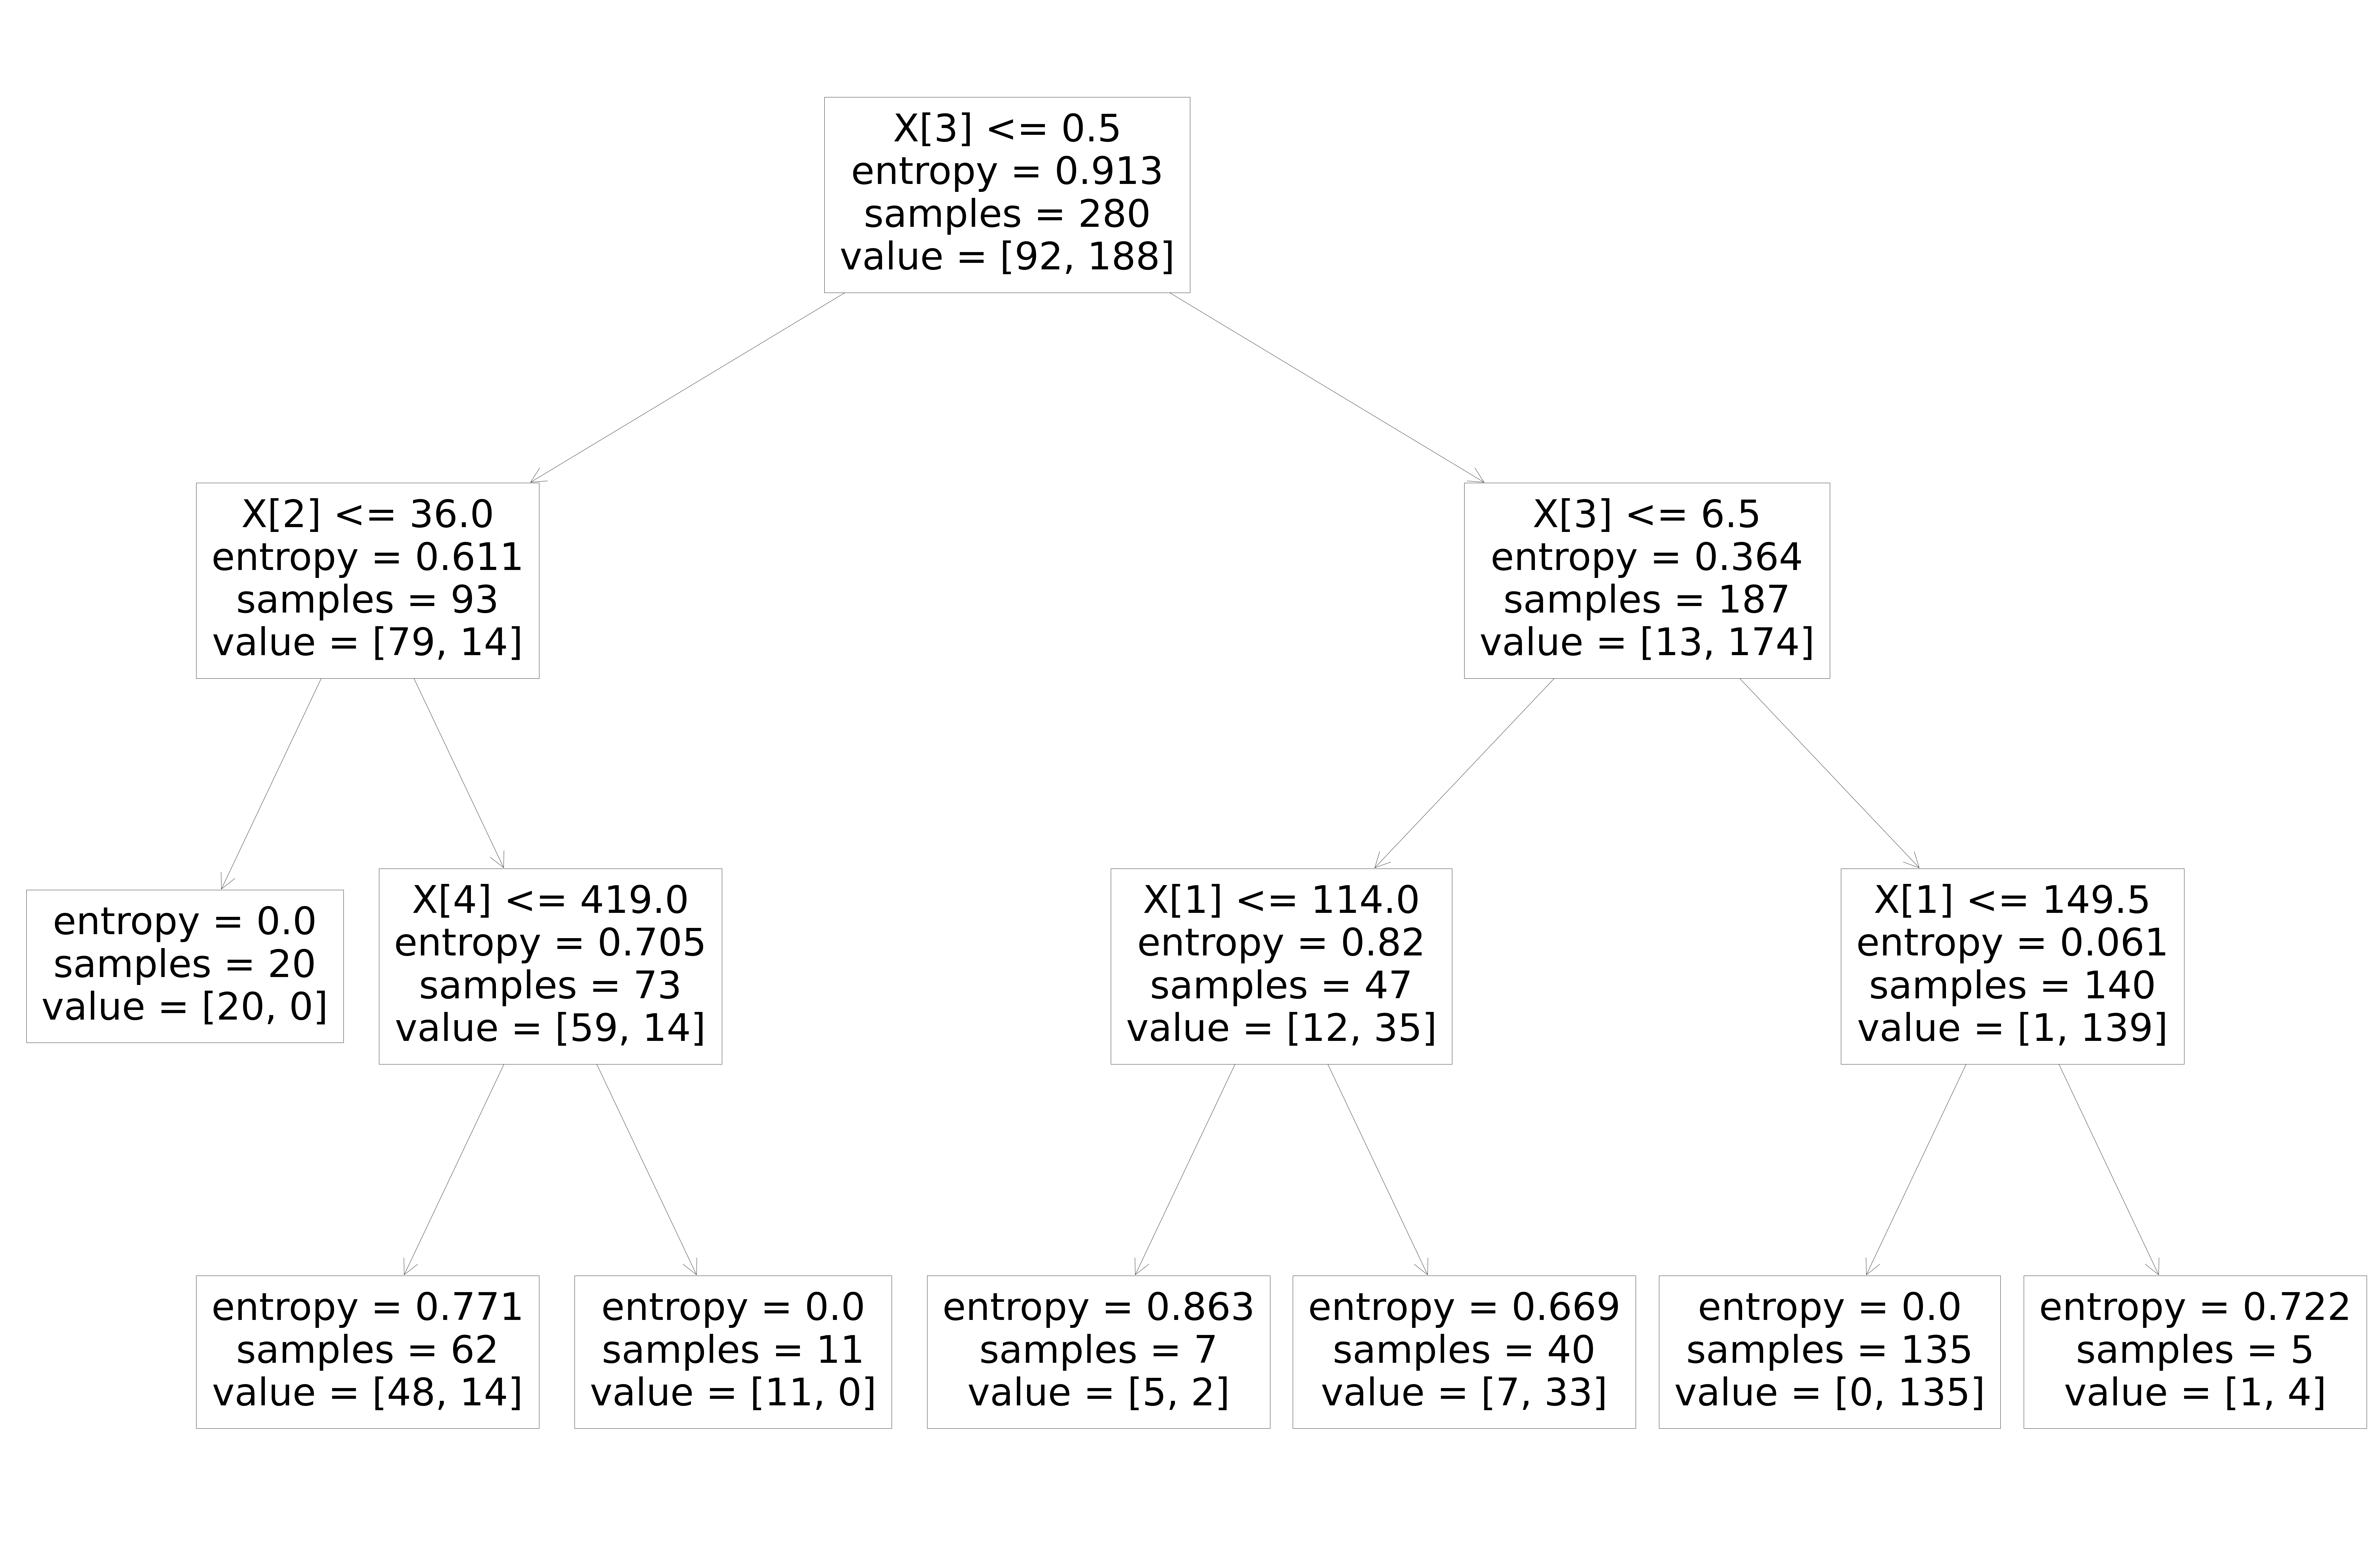

In [22]:
#plot decision tree
fig = plt.figure(figsize=(150,100))
tree.plot_tree(model);

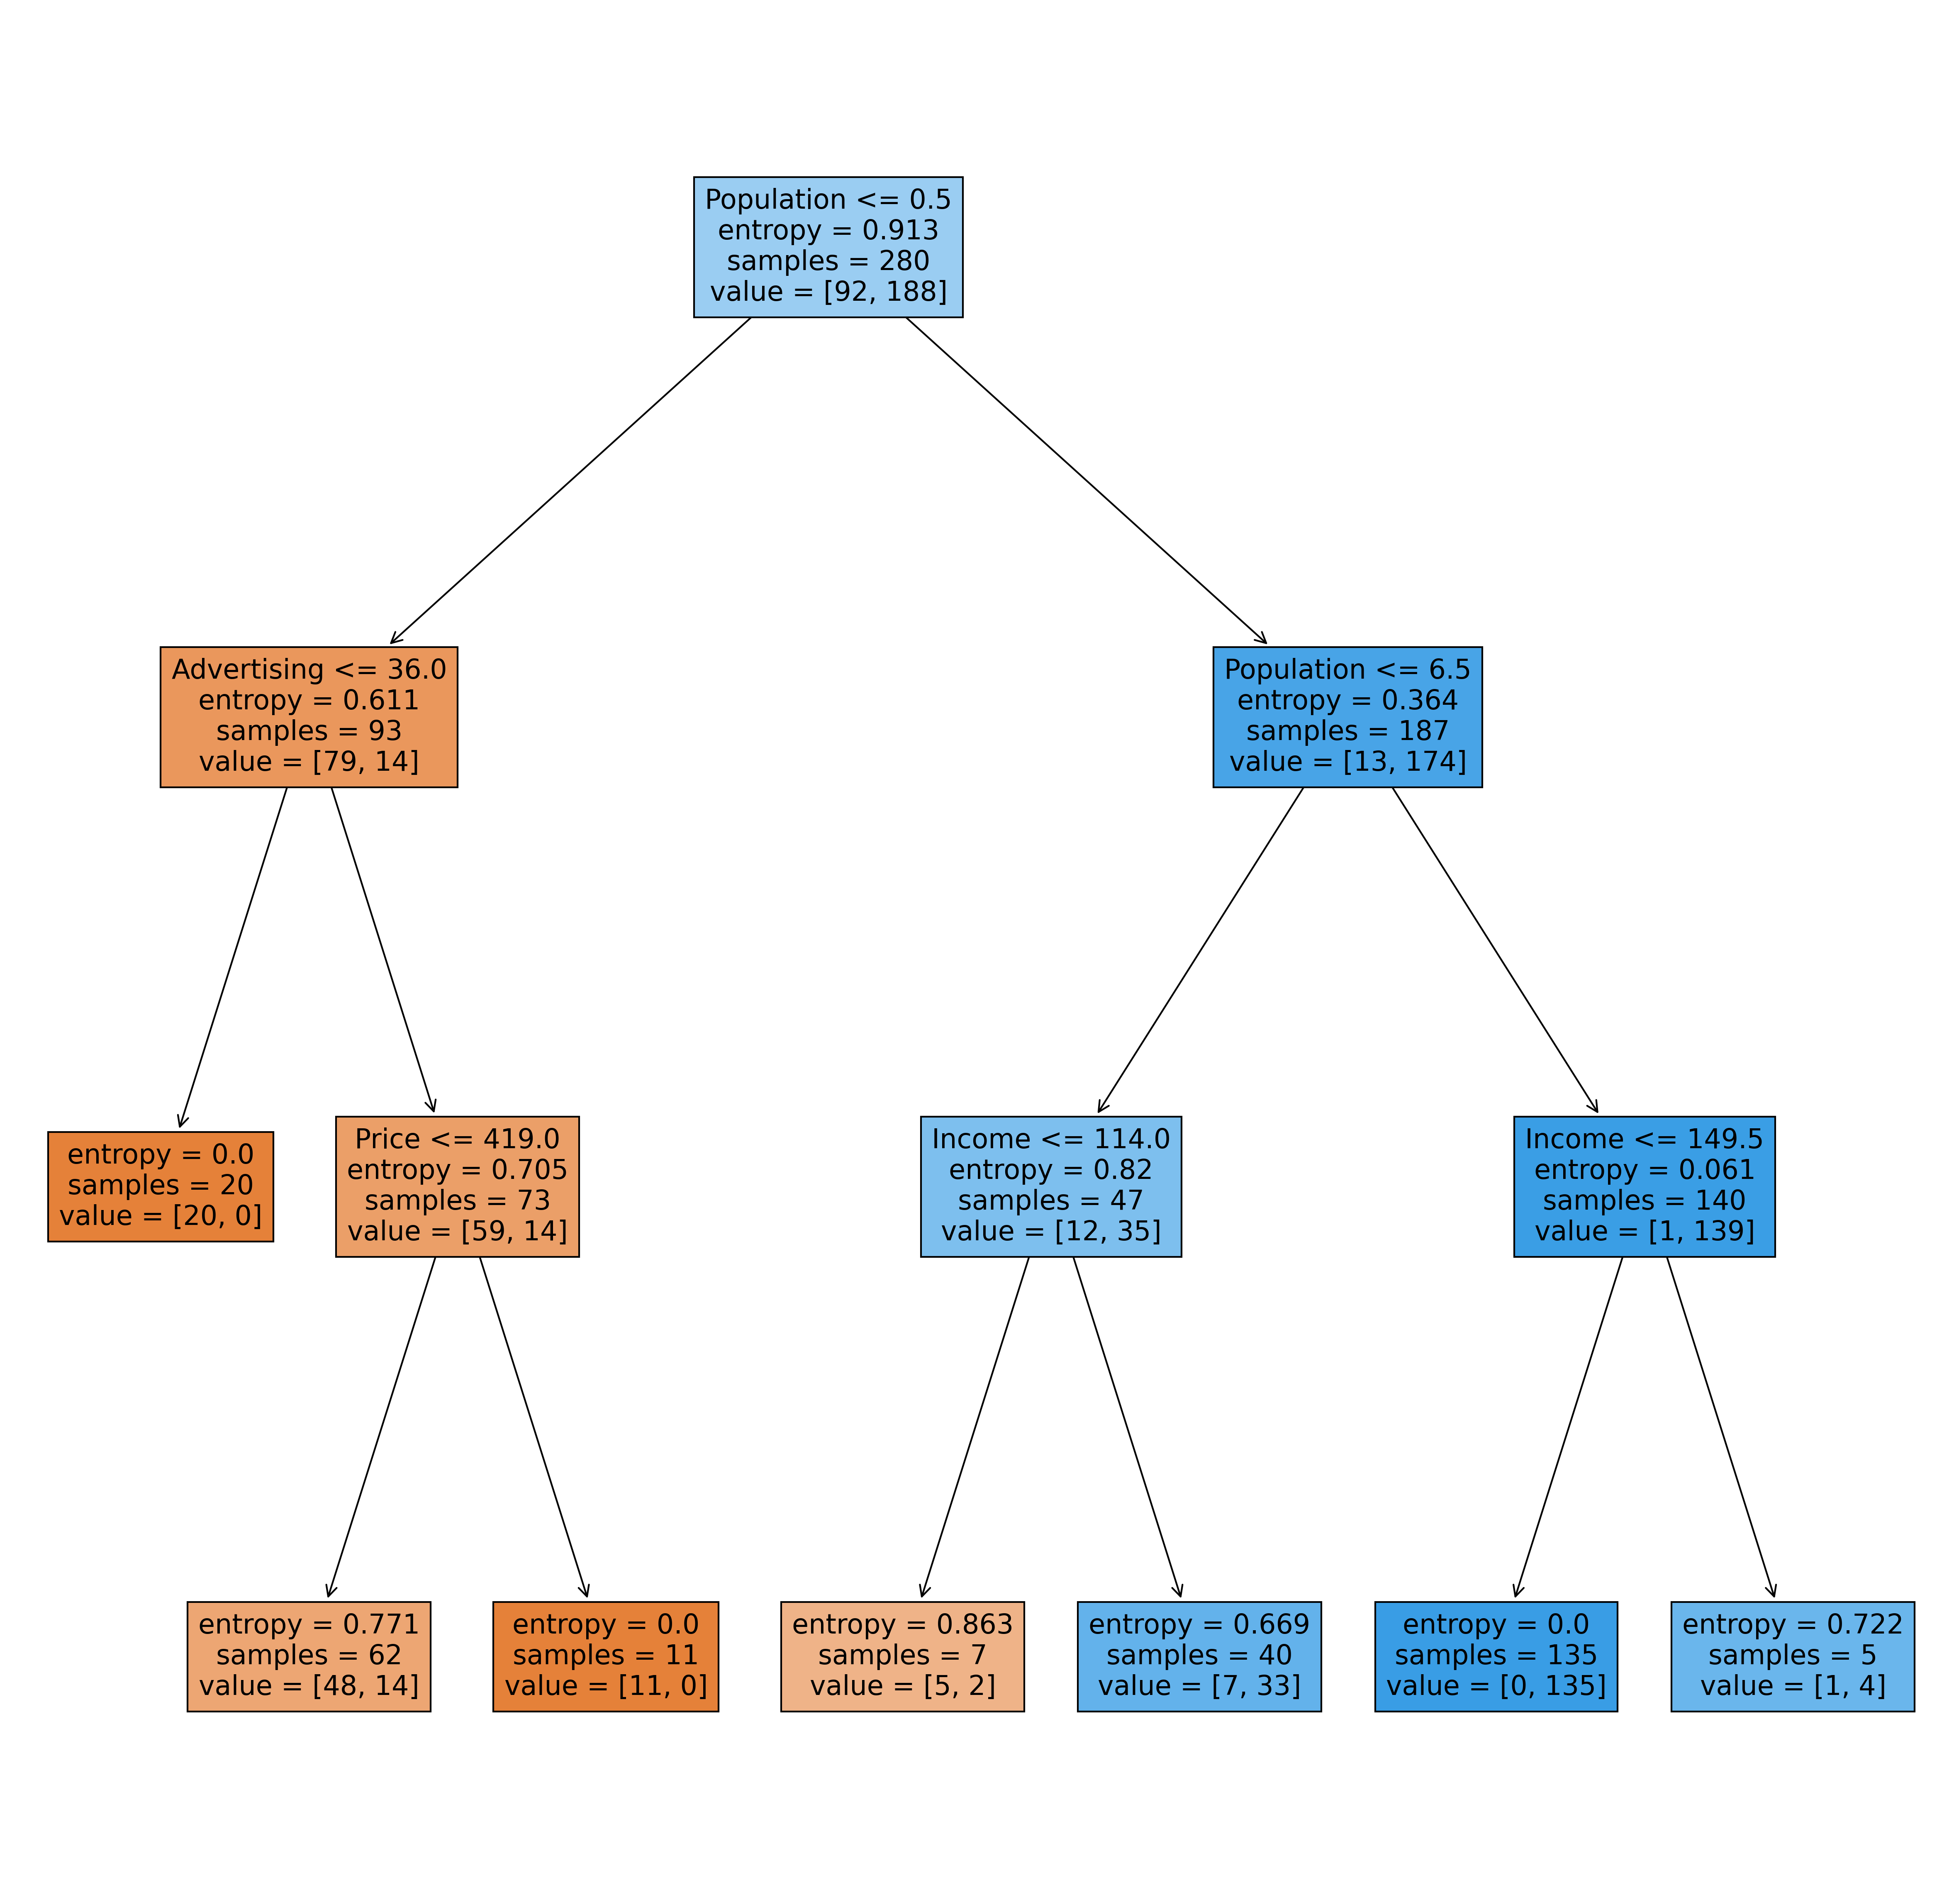

In [23]:
fn=['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               filled = True);

In [24]:
#predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    65
0    55
dtype: int64

In [25]:
preds

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1])

In [26]:
pd.crosstab(y_test,preds) ## getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
US,,
0,46,4
1,9,61


In [27]:
y_test

132    1
390    1
310    1
3      1
248    1
      ..
381    1
53     1
229    0
303    1
37     1
Name: US, Length: 120, dtype: int32

In [28]:
# Accuracy 
np.mean(preds==y_test)

0.8916666666666667

## BUilding a model using gini criteria

In [29]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [30]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [31]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.8916666666666667